## Amazon Electronic Product Recommendation

In [1]:
import pandas as pd

### Adding Column Names

In [2]:
electronics_data = pd.read_csv("ratings_Electronics.csv", names = ['userID','productID', 'Ratings', 'timestamp'])

In [3]:
electronics_data.head()

,userID,productID,Ratings,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [4]:
electronics_data.shape

(1048576, 4)

In [5]:
electronics_data = electronics_data.iloc[:1048576, 0:]

In [6]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
userID       1048576 non-null object
productID    1048576 non-null object
Ratings      1048576 non-null int64
timestamp    1048576 non-null int64
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [7]:
electronics_data.describe()['Ratings']

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Ratings, dtype: float64

### Finding minimum & maximum ratings

In [8]:
print('Minimum ratings are: %d' %(electronics_data.Ratings.min()))
print('Maximum ratings are: %d' %(electronics_data.Ratings.max()))

Minimum ratings are: 1
Maximum ratings are: 5


### Dealing with missing values

In [9]:
print('Missing values in the data: \n', electronics_data.isnull().sum())

Missing values in the data: 
 userID       0
productID    0
Ratings      0
timestamp    0
dtype: int64


### Checking the disibutions of ratings

In [10]:
import seaborn as sns

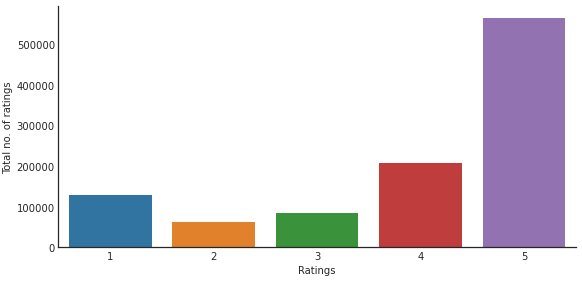

In [11]:
with sns.axes_style('white'):
    g = sns.factorplot("Ratings", data = electronics_data, aspect = 2.0, kind = 'count')
    g.set_ylabels("Total no. of ratings")

### Identifying unique users & products

In [12]:
import numpy as np
print("Total data is:")
print("\nTotal no. of ratings:", electronics_data.shape[0])
print("Total no. of users:", len(np.unique(electronics_data.userID)))
print("Total no. of products:", len(np.unique(electronics_data.productID)))

Total data is:

Total no. of ratings: 1048576
Total no. of users: 786330
Total no. of products: 61894


In [13]:
electronics_data.drop(['timestamp'], axis = 1, inplace = True)

In [14]:
electronics_data.head()

,userID,productID,Ratings
0,AKM1MP6P0OYPR,132793040,5
1,A2CX7LUOHB2NDG,321732944,5
2,A2NWSAGRHCP8N5,439886341,1
3,A2WNBOD3WNDNKT,439886341,3
4,A1GI0U4ZRJA8WN,439886341,1


### Analyzing the ratings

In [15]:
products_rated_per_user = electronics_data.groupby(by = 'userID')['Ratings'].count().sort_values(ascending = False)

In [16]:
products_rated_per_user.head()

userID
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Ratings, dtype: int64

In [17]:
products_rated_per_user.describe()

count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: Ratings, dtype: float64

### Plotting quantiles based on ratings

In [18]:
quantiles = products_rated_per_user.quantile(np.arange(0, 1.01, 0.01), interpolation = 'higher')

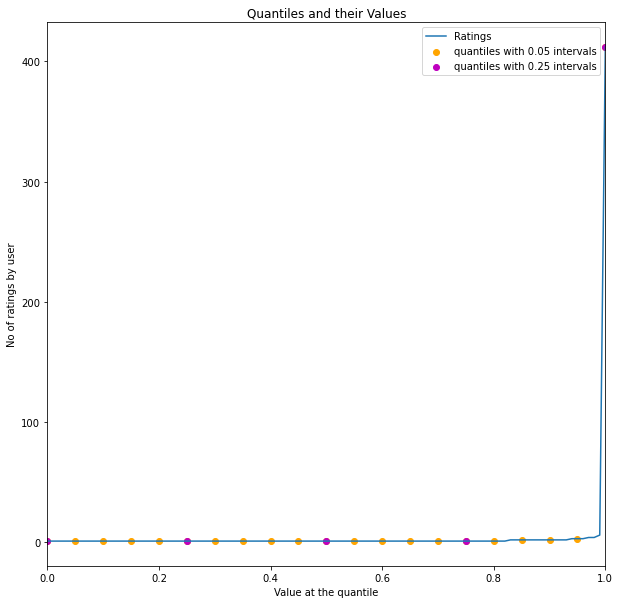

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [20]:
print('\n No. of rated products more than 50: {} \n'.format(sum(products_rated_per_user >= 50)))


 No. of rated products more than 50: 38 



### Collaborative Filtering

In [21]:
new_df=electronics_data.groupby("productID").filter(lambda x:x['Ratings'].count() >=50)
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Ratings', index='userID', columns='productID', fill_value=0)
ratings_matrix.head()

productID,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,3744295508,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userID,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
ratings_matrix.shape

(9832, 76)

In [23]:
X = ratings_matrix.T
X.head()

userID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productID,,,,,,,,,,,,,,,,,,,,,
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0


In [24]:
X.shape

(76, 9832)

### Unique products in the subset

In [25]:
X1 = X

In [26]:
from sklearn.decomposition import TruncatedSVD

In [27]:
SVD = TruncatedSVD(n_components = 10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

### Correlation matrix

In [28]:
corr_matrix = np.corrcoef(decomposed_matrix)
corr_matrix.shape

(76, 76)

In [29]:
X.index[50]

'B00000J434'

### Product ID index

In [30]:
i = "B00000J434"
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

50

In [31]:
corr_product_ID =corr_matrix[product_ID]
corr_product_ID.shape

(76,)

### Recommending top highly correlated electronic products

In [32]:
Recommend = list(X.index[corr_product_ID > 0.01])
Recommend.remove(i)
Recommend[:24]

['1400501466',
 '1400501520',
 '1400501776',
 '1400532736',
 '1400599997',
 '1400698987',
 '6301977173',
 '8862935293',
 '9983891212',
 '9984984354',
 'B00000IGBF',
 'B00000J0D2',
 'B00000J0D8',
 'B00000J1TX',
 'B00000J1V3',
 'B00000J3NF',
 'B00000J3UJ',
 'B00000J4EY',
 'B00000J4FS',
 'B00000JBHP',
 'B00000JCT8',
 'B00000JFE3',
 'B00000JFMK',
 'B00000JII6']

### Recommending based on popularity

In [34]:
new_df=electronics_data.groupby("productID").filter(lambda x:x['Ratings'].count() >=50)

In [35]:
no_of_ratings_per_product = new_df.groupby(by='productID')['Ratings'].count().sort_values(ascending=False)


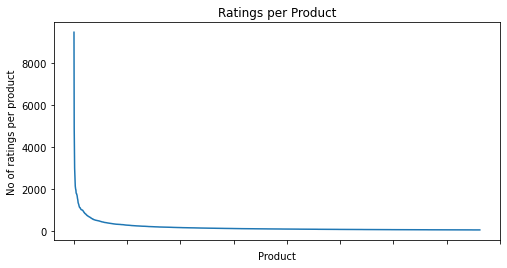

In [36]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('Ratings per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

### Average Ratings

In [37]:
new_df.groupby('productID')['Ratings'].mean().head()

productID
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
1400532655    3.727273
Name: Ratings, dtype: float64

In [38]:
new_df.groupby('productID')['Ratings'].mean().sort_values(ascending=False).head()

productID
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B000I1X3W8    4.869565
Name: Ratings, dtype: float64

### Total Ratings

In [39]:
new_df.groupby('productID')['Ratings'].count().sort_values(ascending=False).head()

productID
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: Ratings, dtype: int64

In [40]:
mean_value = pd.DataFrame(new_df.groupby("productID")["Ratings"].mean())

In [41]:
mean_value["rating_counts"] = pd.DataFrame(new_df.groupby("productID")["Ratings"].count())

In [42]:
mean_value.head()

,Ratings,rating_counts
productID,,
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
1400532655,3.727273,484


In [43]:
mean_value["rating_counts"].max()

9487

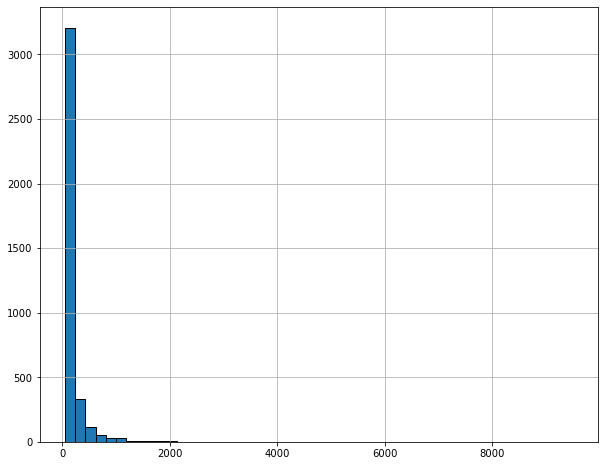

In [48]:
plt.figure(figsize = (10,8))
plt.rcParams["patch.force_edgecolor"] = True
mean_value["rating_counts"].hist(bins = 50)

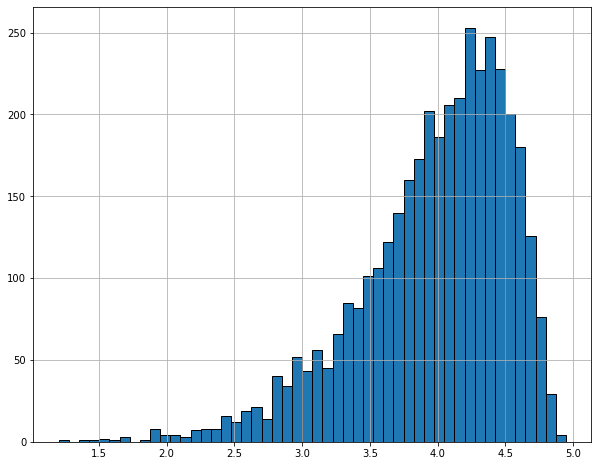

In [50]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
mean_value['Ratings'].hist(bins=50)

### Most Popular Product Recommendation

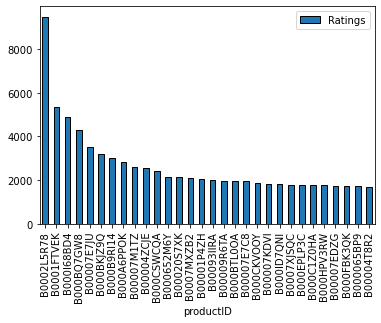

In [51]:
popular_products = pd.DataFrame(new_df.groupby('productID')['Ratings'].count())
most_popular = popular_products.sort_values('Ratings', ascending=False)
most_popular.head(30).plot(kind = "bar")